# **Installing Libraries**



In [ ]:
%pip install ucimlrepo
%pip install pycaret

# **Imporing and Exploring Dataset**

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
liver_disorders = fetch_ucirepo(id=60)

# data (as pandas dataframes)
X = liver_disorders.data.features
y = liver_disorders.data.targets

# metadata
print(liver_disorders.metadata)

# variable information
print(liver_disorders.variables)


{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

In [3]:
liver_disorders.data.features.head()

,mcv,alkphos,sgpt,sgot,gammagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10


# **Comparing 3 different clustering techniques with different number of clusters at various stages of data preprocessing**

# **1. K-Means Clustering**
## **1.1 No Data Processing**

In [4]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(liver_disorders.data.features, verbose=False)

## Building "K-Means" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=3)
print("\nFor Cluster = 4\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
print("\nFor Cluster = 5\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5029,265.7195,0.9032,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3451,247.8721,1.0476,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3538,238.6529,0.9470,0,0,0


## **Elbow plot**

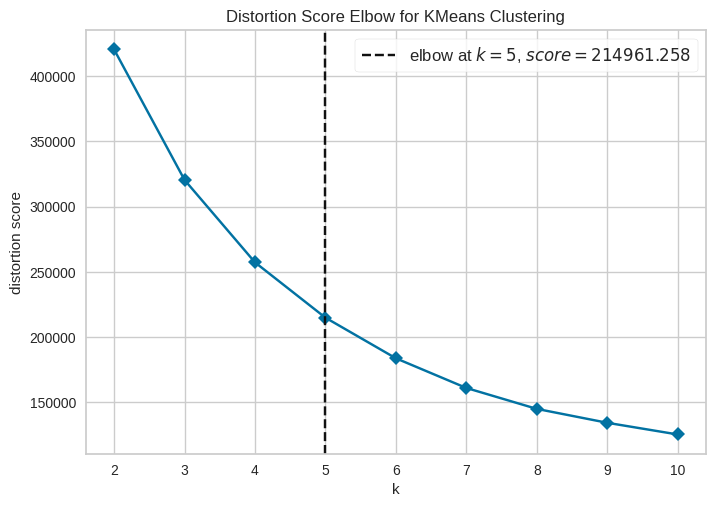

In [5]:
plot_model(KMeanClusteringModel, plot = 'elbow')

## **2D-Plot for KMeans clustering**

In [6]:
plot_model(KMeanClusteringModel, plot='cluster')

## **3D-Plot for KMeans clustering**


In [7]:
plot_model(KMeanClusteringModel, plot = 'tsne')

## **1.2 Using Normalization**

In [8]:
kMeanClusteringParameters = setup(liver_disorders.data.features, normalize=True, normalize_method = 'zscore', verbose=False)

## Building "K-Means" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=3)
print("\nFor Cluster = 4\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
print("\nFor Cluster = 5\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2408,121.1899,1.4558,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2063,110.8564,1.2946,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2147,105.9107,1.2783,0,0,0


## **1.3 Using Transformation**

In [9]:
kMeanClusteringParameters = setup(liver_disorders.data.features, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

## Building "K-Means" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=3)
print("\nFor Cluster = 4\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
print("\nFor Cluster = 5\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5771,676.7177,0.5205,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5512,732.7115,0.5507,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5609,806.3359,0.5523,0,0,0


## **1.4 Using Principal Component Analysis**

In [10]:
kMeanClusteringParameters = setup(liver_disorders.data.features, pca=True, pca_method='linear', verbose=False)

## Building "K-Means" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=3)
print("\nFor Cluster = 4\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
print("\nFor Cluster = 5\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4819,267.3558,0.9425,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3451,247.8721,1.0476,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3570,238.6363,0.9456,0,0,0


## **1.5 Using Transformation + Normalization**

In [11]:
kMeanClusteringParameters = setup(liver_disorders.data.features,
                                  transformation=True, transformation_method='yeo-johnson',
                                  normalize=True, normalize_method='zscore',
                                  verbose=False)

## Building "K-Means" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=3)
print("\nFor Cluster = 4\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
print("\nFor Cluster = 5\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1818,100.3143,1.6549,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1737,89.4982,1.5691,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1784,83.9301,1.4593,0,0,0


## **1.6 Using Transformation + Normalization + Principal Component Analysis**

In [12]:
kMeanClusteringParameters = setup(liver_disorders.data.features,
                                  pca=True, pca_method='linear',
                                  transformation = True, transformation_method = 'yeo-johnson',
                                  normalize=True, normalize_method = 'zscore',
                                  verbose=False)

## Building "K-Means" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=3)
print("\nFor Cluster = 4\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
print("\nFor Cluster = 5\n")
KMeanClusteringModel = create_model('kmeans', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1658,98.5102,1.7330,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1768,89.4818,1.5624,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1780,84.0162,1.4093,0,0,0


## **3D-Plot for KMeans Clustering**

In [13]:
plot_model(KMeanClusteringModel, plot = 'tsne')

# **2. Hierarchical Clustering**
## **2.1 No Data Processing**

In [14]:
hClusteringParameters = setup(liver_disorders.data.features, verbose=False)

## Building "Hierarchical" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
hClusteringModel = create_model('hclust', num_clusters=3)
print("\nFor Cluster = 4\n")
hClusteringModel = create_model('hclust', num_clusters=4)
print("\nFor Cluster = 5\n")
hClusteringModel = create_model('hclust', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4267,241.9802,1.0147,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2998,223.6861,1.1214,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3077,221.3206,1.0054,0,0,0


## **Elbow plot**

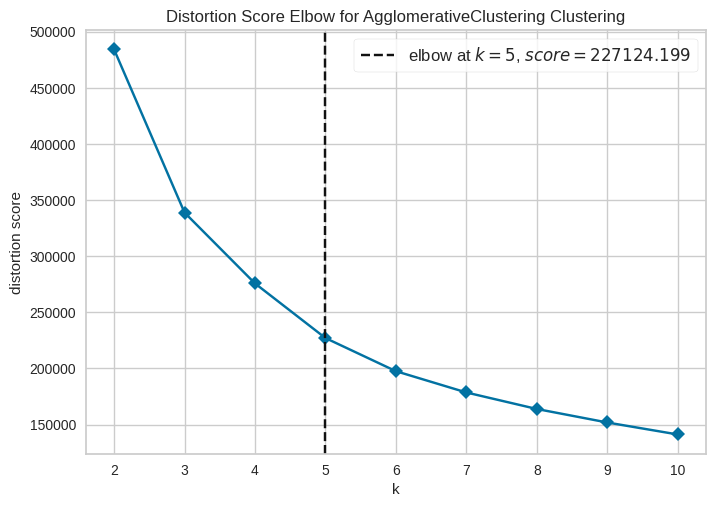

In [15]:
plot_model(hClusteringModel, plot = 'elbow')

## **2D-Plot for Hierarchical clustering**

In [16]:
plot_model(hClusteringModel, plot='cluster')

## **3D-Plot for Hierarchical clustering**

In [17]:
plot_model(hClusteringModel, plot='tsne')

## **2.2 Using Normalization**

In [18]:
hClusteringParameters = setup(liver_disorders.data.features,
                              normalize=True, normalize_method='zscore',
                              verbose=False)

## Building "Hierarchical" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
hClusteringModel = create_model('hclust', num_clusters=3)
print("\nFor Cluster = 4\n")
hClusteringModel = create_model('hclust', num_clusters=4)
print("\nFor Cluster = 5\n")
hClusteringModel = create_model('hclust', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1835,96.8866,1.4920,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1935,89.7327,1.3327,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1750,90.6840,1.2394,0,0,0


## **2.3 Using Transformation**

In [19]:
hClusteringParameters = setup(liver_disorders.data.features,
                              transformation = True, transformation_method = 'yeo-johnson', verbose=False)

## Building "Hierarchical" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
hClusteringModel = create_model('hclust', num_clusters=3)
print("\nFor Cluster = 4\n")
hClusteringModel = create_model('hclust', num_clusters=4)
print("\nFor Cluster = 5\n")
hClusteringModel = create_model('hclust', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5719,676.0729,0.5282,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5613,684.5832,0.5486,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5479,736.6640,0.5422,0,0,0


## **2.4 Using Principal Component Analysis**

In [20]:
hClusteringParameters = setup(liver_disorders.data.features,
                              pca = True, pca_method = 'linear', verbose=False)

## Building "Hierarchical" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
hClusteringModel = create_model('hclust', num_clusters=3)
print("\nFor Cluster = 4\n")
hClusteringModel = create_model('hclust', num_clusters=4)
print("\nFor Cluster = 5\n")
hClusteringModel = create_model('hclust', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4267,241.9802,1.0147,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2998,223.6861,1.1214,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3077,221.3206,1.0054,0,0,0


## **2.5 Using Transformation + Normalization**

In [21]:
hClusteringParameters = setup(liver_disorders.data.features,
                              transformation = True, transformation_method = 'yeo-johnson',
                              normalize=True, normalize_method='zscore',
                              verbose=False)

## Building "Hierarchical" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
hClusteringModel = create_model('hclust', num_clusters=3)
print("\nFor Cluster = 4\n")
hClusteringModel = create_model('hclust', num_clusters=4)
print("\nFor Cluster = 5\n")
hClusteringModel = create_model('hclust', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1376,75.6910,1.6012,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1337,70.9374,1.7713,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1214,65.4887,1.6555,0,0,0


## **2.6 Using Normalization + Transformation + Principal Component Analysis**


In [22]:
hClusteringParameters = setup(liver_disorders.data.features,
                              transformation = True, transformation_method = 'yeo-johnson',
                              normalize=True, normalize_method='zscore',
                              pca = True, pca_method = 'linear',
                              verbose=False)

## Building "Hierarchical" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
hClusteringModel = create_model('hclust', num_clusters=3)
print("\nFor Cluster = 4\n")
hClusteringModel = create_model('hclust', num_clusters=4)
print("\nFor Cluster = 5\n")
hClusteringModel = create_model('hclust', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1376,75.6910,1.6012,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1337,70.9374,1.7713,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1214,65.4887,1.6555,0,0,0


## **3D-Plot for Hierarchical clustering**

In [23]:
plot_model(hClusteringModel, plot='tsne')

# **3. Birch Clustering**
## **3.1 No Data Processing**

In [24]:
BirchClusteringParameters = setup(liver_disorders.data.features, verbose=False)

## Building "Birch" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
BirchClusteringModel = create_model('birch', num_clusters=3)
print("\nFor Cluster = 4\n")
BirchClusteringModel = create_model('birch', num_clusters=4)
print("\nFor Cluster = 5\n")
BirchClusteringModel = create_model('birch', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4498,241.5820,1.0043,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2805,221.9534,1.1432,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2889,219.4124,1.0209,0,0,0


## **Elbow plot**

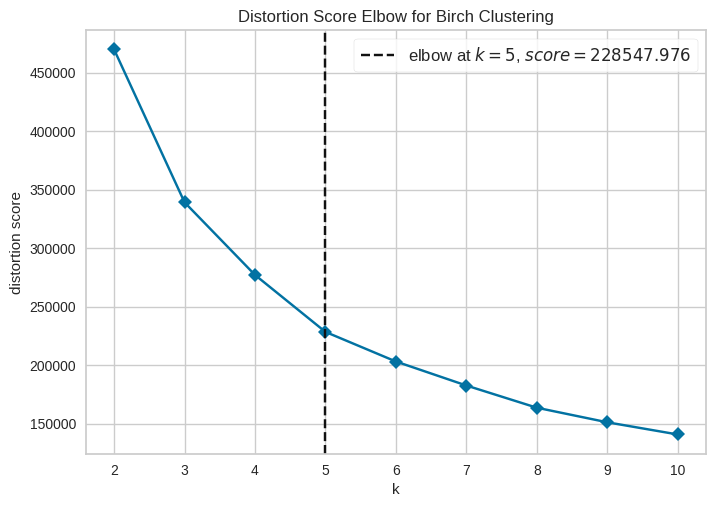

In [25]:
plot_model(BirchClusteringModel, plot = 'elbow')

## **2D-Plot for Birch Clustering**

In [26]:
plot_model(BirchClusteringModel, plot='cluster')

## **3D-Plot for Birch Clustering**

In [27]:
plot_model(BirchClusteringModel, plot='tsne')

## **3.2 Using Normalization**

In [28]:
BirchClusteringParameters = setup(liver_disorders.data.features,
                                  normalize = True, normalize_method='zscore',
                                  verbose=False)

## Building "Birch" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
BirchClusteringModel = create_model('birch', num_clusters=3)
print("\nFor Cluster = 4\n")
BirchClusteringModel = create_model('birch', num_clusters=4)
print("\nFor Cluster = 5\n")
BirchClusteringModel = create_model('birch', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1666,100.8751,1.7031,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1707,84.1517,1.5240,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1835,85.3766,1.3716,0,0,0


## **3.3 Using Transformation**

In [29]:
BirchClusteringParameters = setup(liver_disorders.data.features,
                                  transformation=True, transformation_method='yeo-johnson',
                                  verbose=False)

## Building "Birch" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
BirchClusteringModel = create_model('birch', num_clusters=3)
print("\nFor Cluster = 4\n")
BirchClusteringModel = create_model('birch', num_clusters=4)
print("\nFor Cluster = 5\n")
BirchClusteringModel = create_model('birch', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4163,244.9488,0.4854,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4575,512.6839,0.5545,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4445,454.1137,0.4535,0,0,0


## **3.4 Using Principal Component Analysis**

In [30]:
BirchClusteringParameters = setup(liver_disorders.data.features,
                                  pca=True, pca_method='linear',
                                  verbose=False)

## Building "Birch" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
BirchClusteringModel = create_model('birch', num_clusters=3)
print("\nFor Cluster = 4\n")
BirchClusteringModel = create_model('birch', num_clusters=4)
print("\nFor Cluster = 5\n")
BirchClusteringModel = create_model('birch', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4498,241.5820,1.0043,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2805,221.9534,1.1432,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2889,219.4124,1.0209,0,0,0


## **3.5 Transformation + Normalization**

In [31]:
BirchClusteringParameters = setup(liver_disorders.data.features,
                                  normalize=True, normalize_method='zscore',
                                  transformation=True, transformation_method='yeo-johnson',
                                  verbose=False)

## Building "Birch" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
BirchClusteringModel = create_model('birch', num_clusters=3)
print("\nFor Cluster = 4\n")
BirchClusteringModel = create_model('birch', num_clusters=4)
print("\nFor Cluster = 5\n")
BirchClusteringModel = create_model('birch', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1335,70.7374,1.7626,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1398,66.6931,1.6558,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1426,64.4965,1.4990,0,0,0


## **3.6 Using Normalization + Transformation + Principal Component Analysis**

In [32]:
BirchClusteringParameters = setup(liver_disorders.data.features,
                                  normalize=True, normalize_method='zscore',
                                  transformation=True, transformation_method='yeo-johnson',
                                  pca = True, pca_method="linear",
                                  verbose=False)

## Building "Birch" clustering models with cluster size - 3,4,5
print("For Cluster = 3\n")
BirchClusteringModel = create_model('birch', num_clusters=3)
print("\nFor Cluster = 4\n")
BirchClusteringModel = create_model('birch', num_clusters=4)
print("\nFor Cluster = 5\n")
BirchClusteringModel = create_model('birch', num_clusters=5)

For Cluster = 3



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1335,70.7374,1.7626,0,0,0



For Cluster = 4



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1398,66.6931,1.6558,0,0,0



For Cluster = 5



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1426,64.4965,1.4990,0,0,0


## **3D-Plot for Birch Clustering**

In [33]:
plot_model(BirchClusteringModel, plot='tsne')